# Assignment No.02

# Context of Data
Company - UK-based and registered non-store online retail

Products for selling - Mainly all-occasion gifts

Customers - Most are wholesalers (local or international)

Transactions Period - **<span class="mark">1st Dec 2010 - 9th Dec 2011</span>** (One year)


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [2]:
# specify encoding to deal with different formats
df = pd.read_csv('Ecommerce - UK Retailer.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# change the column names
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [5]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


# 1. Perform Basic EDA

a. Boxplot – All Numeric Variables

In [7]:
df.describe().round(2)

,quantity,unit_price,cust_id
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


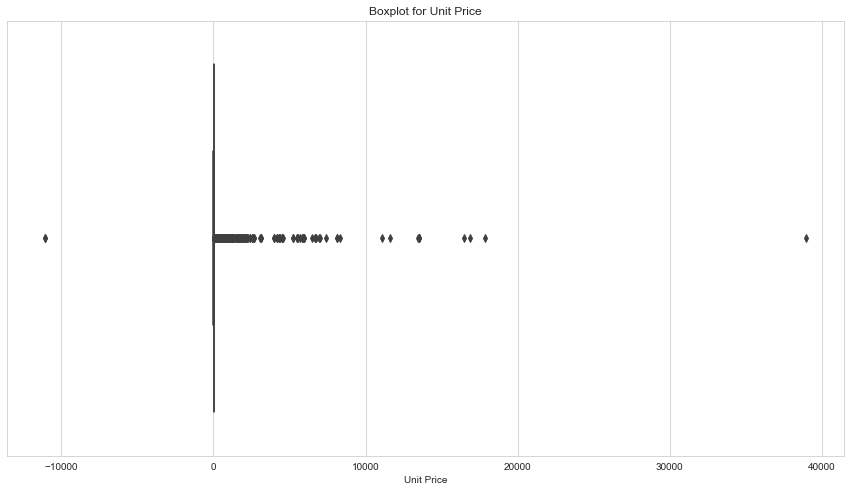

In [8]:
# boxplot for unit_price
plt.subplots(figsize=(15,8))
sns.boxplot(df.unit_price)
plt.xlabel("Unit Price")
plt.title("Boxplot for Unit Price")
plt.show()

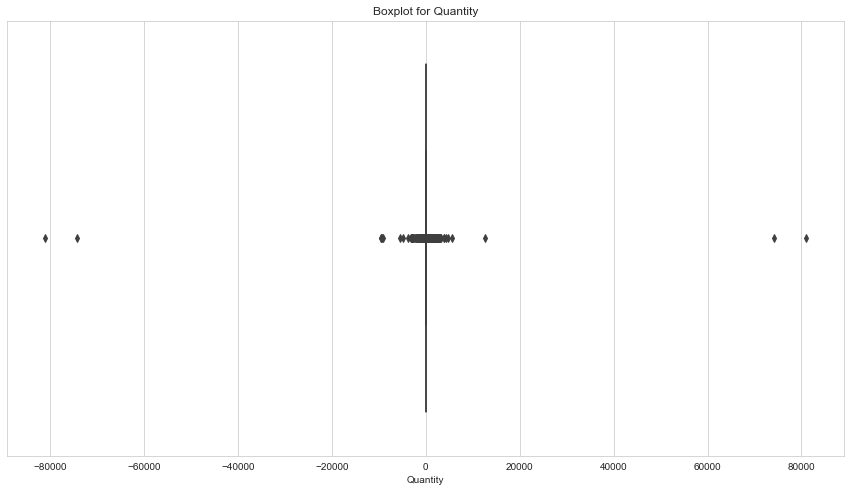

In [9]:
# boxplot for quantity
plt.subplots(figsize=(15,8))
sns.boxplot(df.quantity)
plt.xlabel("Quantity")
plt.title("Boxplot for Quantity")
plt.show()

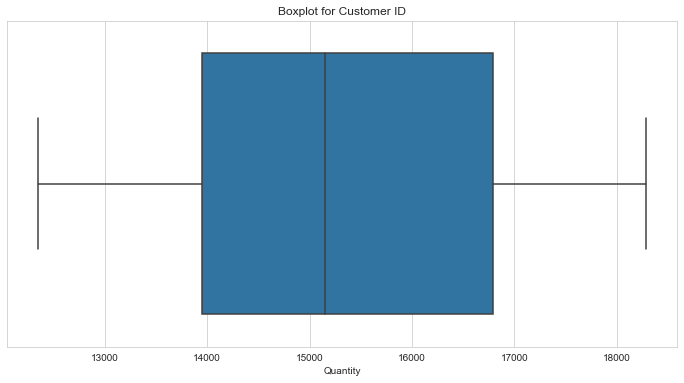

In [10]:
# boxplot for Customer ID
plt.subplots(figsize=(12,6))
sns.boxplot(df.cust_id)
plt.xlabel("Quantity")
plt.title("Boxplot for Customer ID")
plt.show()

b. Histogram – All Numeric Variables

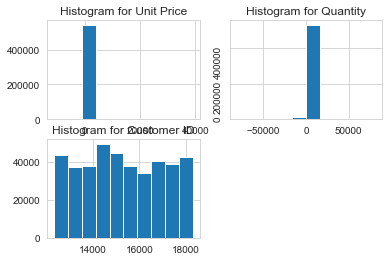

In [11]:
plt.subplot(2,2,1)
plt.hist(df['unit_price'])
plt.title('Histogram for Unit Price')
plt.show;
plt.subplot(2,2,2)
plt.hist(df["quantity"])
plt.title('Histogram for Quantity')
plt.yticks(rotation=90)
plt.show;
plt.subplot(2,2,3)
plt.hist(df["cust_id"])
plt.title('Histogram for Customer ID')
plt.show;

c. Distribution Plot – All Numeric Variables

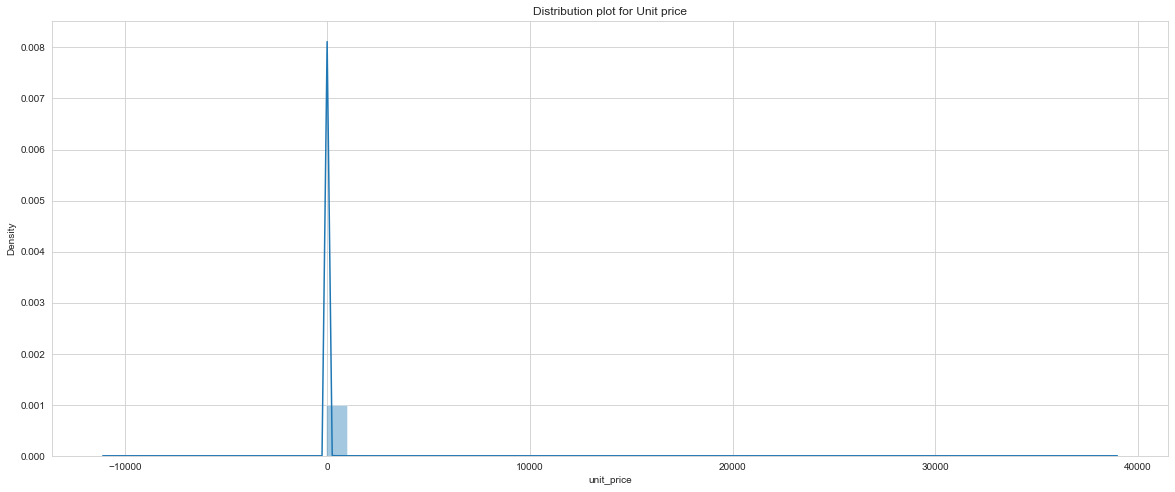

In [12]:
# Distribution plot for Unit price
plt.subplots(figsize=(20,8))
sns.distplot(df['unit_price'])
plt.title("Distribution plot for Unit price")
plt.show()

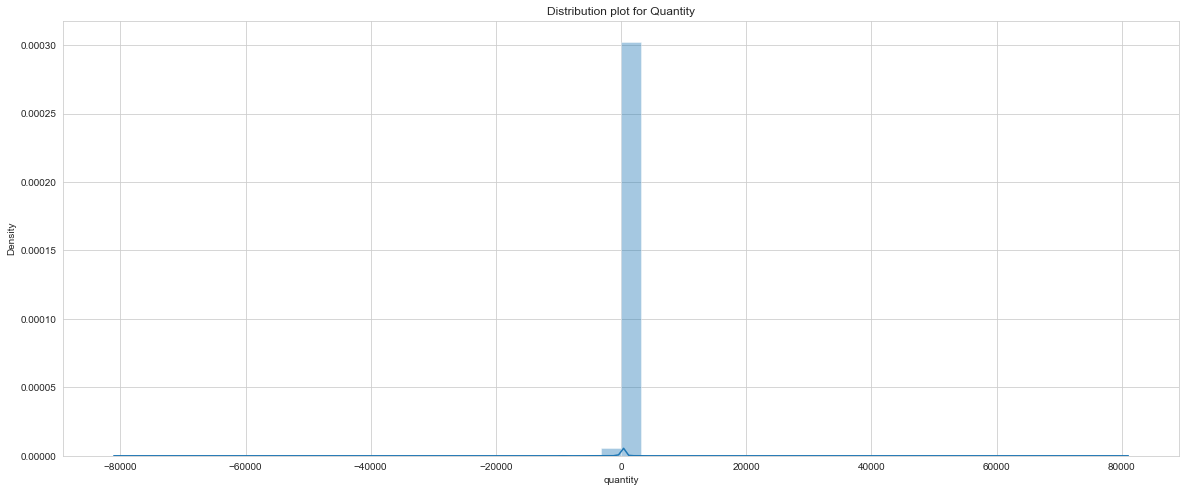

In [13]:
# Distribution plot for Quantity
plt.subplots(figsize=(20,8))
sns.distplot(df['quantity'])
plt.title("Distribution plot for Quantity")
plt.show()

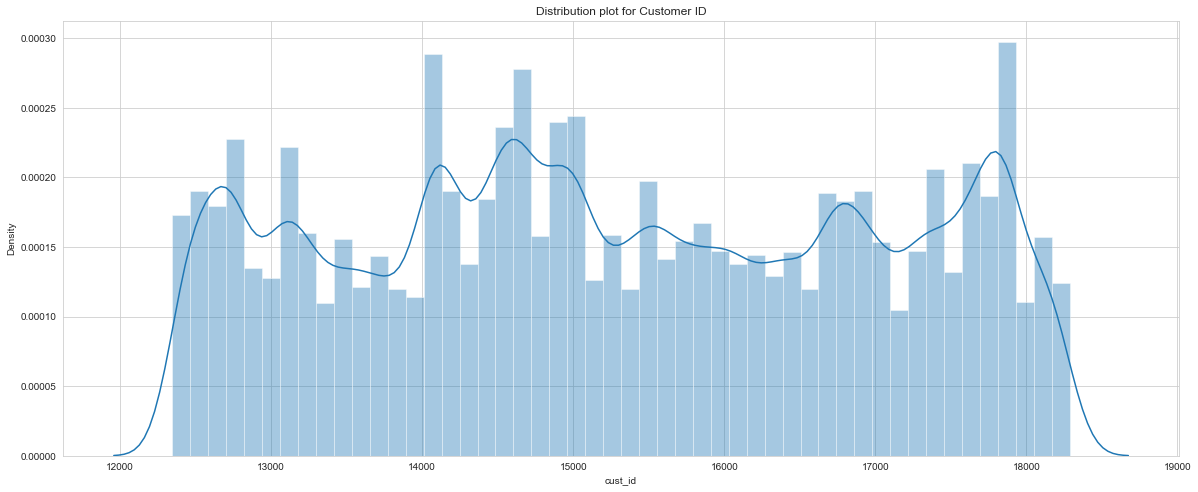

In [14]:
# Distribution plot for Customer ID
plt.subplots(figsize=(20,8))
sns.distplot(df['cust_id'])
plt.title("Distribution plot for Customer ID")
plt.show()

d. Aggregation for all numerical Columns

In [15]:
df.describe()

,quantity,unit_price,cust_id
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
df.aggregate({"unit_price":['sum', 'min','max'],
              "quantity":['sum', 'min','max']})

,unit_price,quantity
sum,2498803.974,5176450
min,-11062.060,-80995
max,38970.000,80995


e. Unique Values across all columns

In [17]:
uniqueValues = df.nunique()
print('unique value of each column :')
uniqueValues

unique value of each column :


invoice_num     25900
stock_code       4070
description      4223
quantity          722
invoice_date    23260
unit_price       1630
cust_id          4372
country            38
dtype: int64

f. Duplicate values across all columns

In [18]:
duplicateValues = df[df.duplicated()]
print('duplicate value of each column :')
duplicateValues.head()

duplicate value of each column :


,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom


g. Correlation – Heatmap - All Numeric Variables

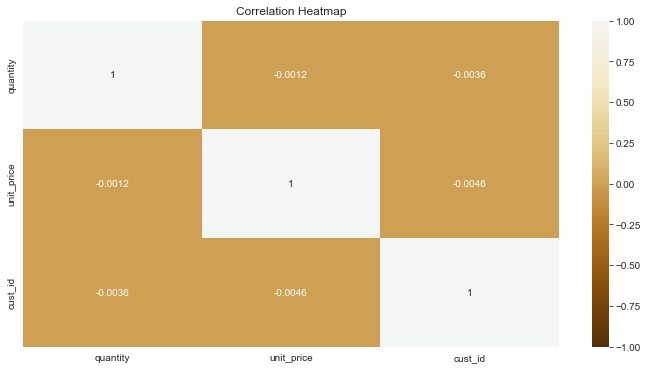

In [19]:
plt.figure(figsize=(12, 6))
heatmap=sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True,center=True,cbar=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap')
plt.show()

h. Regression Plot - All Numeric Variables

<Figure size 1440x576 with 0 Axes>

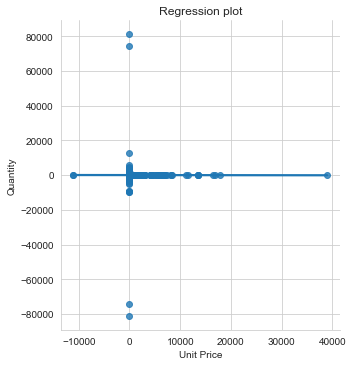

In [20]:
plt.figure(figsize=(20, 8))
sns.lmplot(x = "unit_price",
            y = "quantity", 
            ci = None,            
            data = df)
plt.xlabel("Unit Price")
plt.ylabel("Quantity")
plt.title("Regression plot")
plt.show()

i. Bar Plot – Every Categorical Variable vs every Numerical Variable

In [21]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


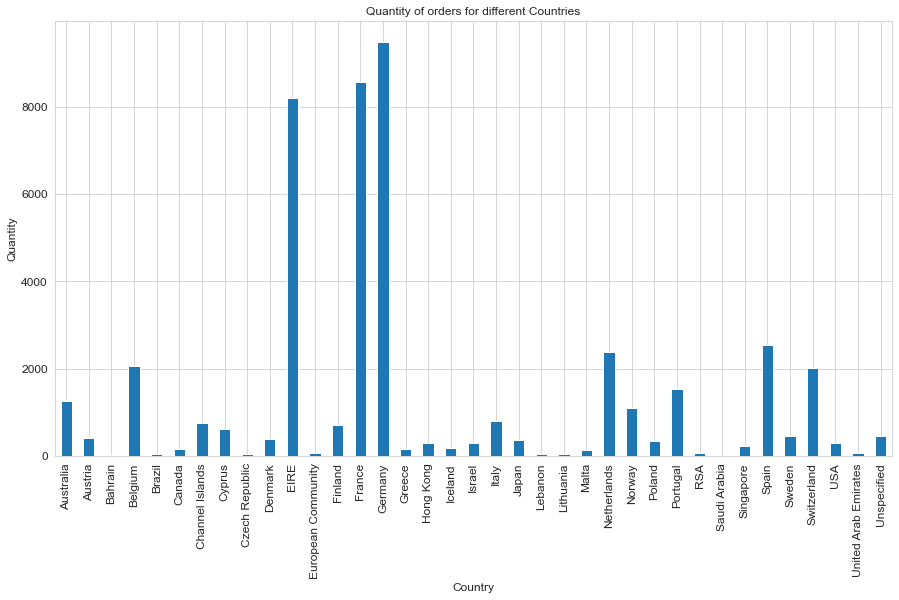

In [22]:
x=df.groupby('country')['quantity'].count()
del x['United Kingdom']
plt.subplots(figsize=(15,8))
x.plot(kind='bar', fontsize=12, color=color[0])
plt.xlabel('Country', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Quantity of orders for different Countries', fontsize=12)
plt.show()

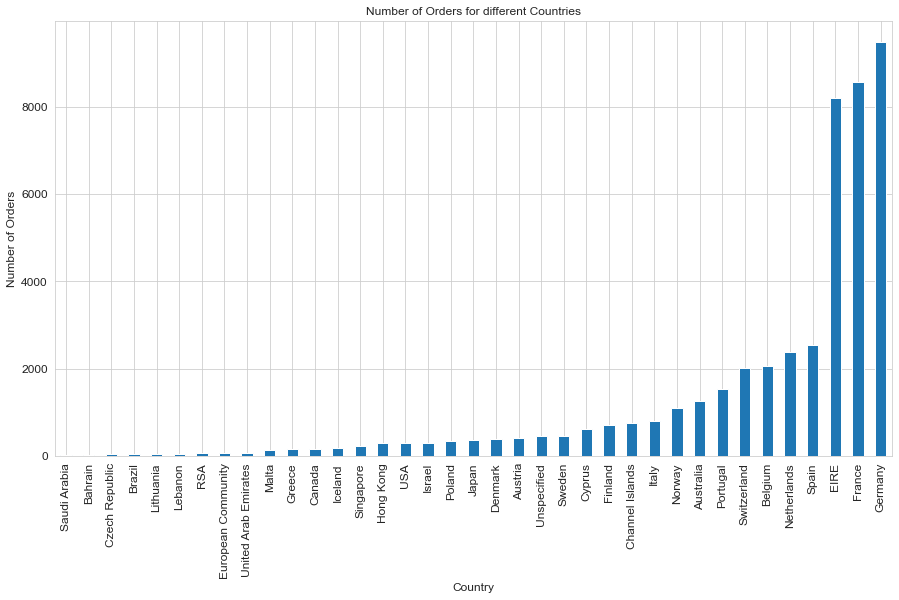

In [23]:
group_country_orders = df.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom'] # for illustration purpose

# plot number of orders in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='bar', fontsize=12, color=color[0])
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

j. Pair plot - All Numeric Variables

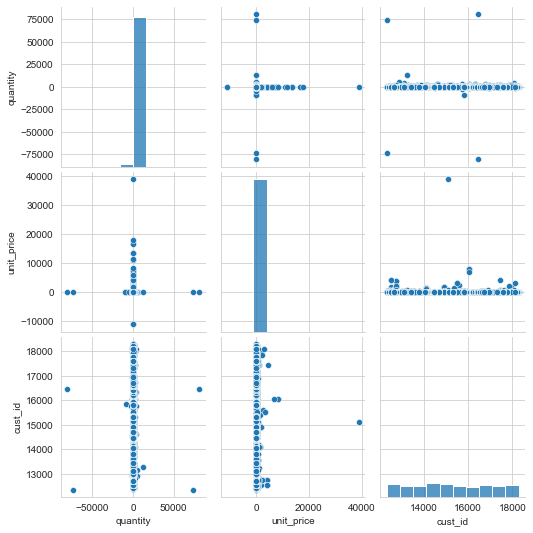

In [24]:
#pairplot for all numeric variables
pair_plot=sns.pairplot(df, diag_kws = {"bins": 10})

k. Line chart to show the trend of data - All Numeric/Date Variables

In [25]:
tt=df.copy()

In [26]:
import datetime as dt

tt.head()

tt['invoice_date'] = pd.to_datetime(tt.invoice_date, format='%m/%d/%Y %H:%M')

tt.insert(loc=2, column='Year_month', value=tt['invoice_date'].map(lambda x: 100*x.year + x.month))
tt.insert(loc=3, column='Month', value=tt.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
tt.insert(loc=4, column='Day', value=(tt.invoice_date.dt.dayofweek)+1)
tt.insert(loc=5, column='Hour', value=tt.invoice_date.dt.hour)

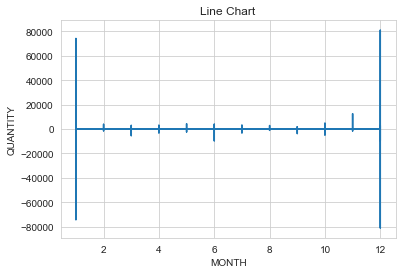

In [27]:
plt.figure()
x= tt['Month']
y = tt['quantity']
plt.xlabel("MONTH")  # add X-axis label
plt.ylabel("QUANTITY")  # add Y-axis label
plt.title("Line Chart")
plt.plot(x,y)

l. Plot the skewness - All Numeric Variables

In [28]:
skewness= pd.DataFrame(df)

print(df.skew())


quantity       -0.264076
unit_price    186.506972
cust_id         0.029835
dtype: float64


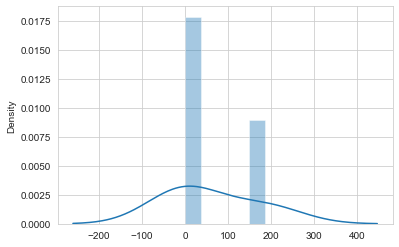

In [29]:
sns.distplot(df.skew(), bins=5)
plt.show()

# 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [30]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
invoice_num          0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

In [31]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [32]:
import statistics
Cust_mean=df["cust_id"].mean()
df['cust_id']=df["cust_id"].fillna(x)
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [33]:
df.isnull().sum().sort_values(ascending=False)

description     1454
invoice_num        0
stock_code         0
quantity           0
invoice_date       0
unit_price         0
cust_id            0
country            0
dtype: int64

In [34]:
# change the invoice_date format - String to Timestamp format
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

In [35]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 3. Remove duplicate rows

In [36]:
# df_new without missing values
df1 = df.dropna()

In [37]:
# check missing values for each column 
df1.isnull().sum().sort_values(ascending=False)

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   540455 non-null  object        
 1   stock_code    540455 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      540455 non-null  int64         
 4   invoice_date  540455 non-null  datetime64[ns]
 5   unit_price    540455 non-null  float64       
 6   cust_id       540455 non-null  float64       
 7   country       540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


In [39]:
# change columns tyoe - String to Int type 
df1['cust_id'] = df1['cust_id'].astype('int64')

In [40]:
df1.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   540455 non-null  object        
 1   stock_code    540455 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      540455 non-null  int64         
 4   invoice_date  540455 non-null  datetime64[ns]
 5   unit_price    540455 non-null  float64       
 6   cust_id       540455 non-null  int64         
 7   country       540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 37.1+ MB


In [42]:
df1.describe().round(2)

,quantity,unit_price,cust_id
count,540455.00,540455.00,540455.00
mean,9.60,4.62,11509.68
std,218.01,96.89,6757.68
min,-80995.00,-11062.06,1.00
25%,1.00,1.25,12367.00
50%,3.00,2.08,14390.00
75%,10.00,4.13,16261.00
max,80995.00,38970.00,18287.00


# 4. Remove rows which have negative values in Quantity column

In [43]:
df1 = df1[df1.quantity > 0]

In [44]:
df1.describe().round(2)

,quantity,unit_price,cust_id
count,530693.00,530693.00,530693.00
mean,10.61,3.86,11469.83
std,156.64,41.83,6785.18
min,1.00,-11062.06,1.00
25%,1.00,1.25,12.00
50%,3.00,2.08,14383.00
75%,10.00,4.13,16265.00
max,80995.00,13541.33,18287.00


# 5. Add the columns - Month, Day and Hour for the invoice

In [45]:
df1.insert(loc=2, column='year_month', value=df1['invoice_date'].map(lambda x: 100*x.year + x.month))
df1.insert(loc=3, column='month', value=df1.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df1.insert(loc=4, column='day', value=(df1.invoice_date.dt.dayofweek)+1)
df1.insert(loc=5, column='hour', value=df1.invoice_date.dt.hour)

In [46]:
df1.head()

,invoice_num,stock_code,year_month,month,day,hour,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# 6. How many orders made by the customers?

In [47]:
df1.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,1,Hong Kong,57
1,1,Israel,14
2,1,United Kingdom,13016
3,2,EIRE,86
4,2,United Kingdom,7145


In [48]:
orders = df1.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()


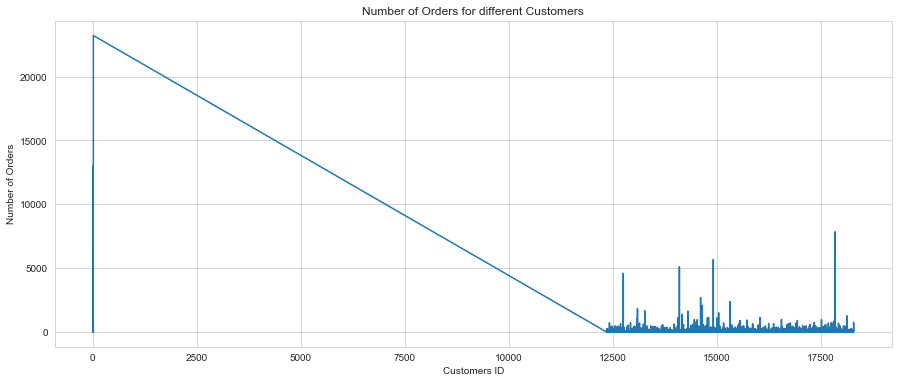

In [49]:
plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [50]:
index = pd.Index(df1['quantity'])
print(f"Total orders made by the customers = {index.value_counts().sum()}")

Total orders made by the customers = 530693


# 7. TOP 5 customers with higher number of orders

In [51]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_num', ascending=False).head()

The TOP 5 customers with most number of orders...


,cust_id,country,invoice_num
42,12,United Kingdom,23226
38,11,United Kingdom,18736
2,1,United Kingdom,13016
21,7,United Kingdom,11616
34,10,United Kingdom,9634


# 8. How much money spent by the customers?

In [52]:
# Add the column - amount_spent 
df1['amount_spent'] = df1['quantity'] * df1['unit_price']

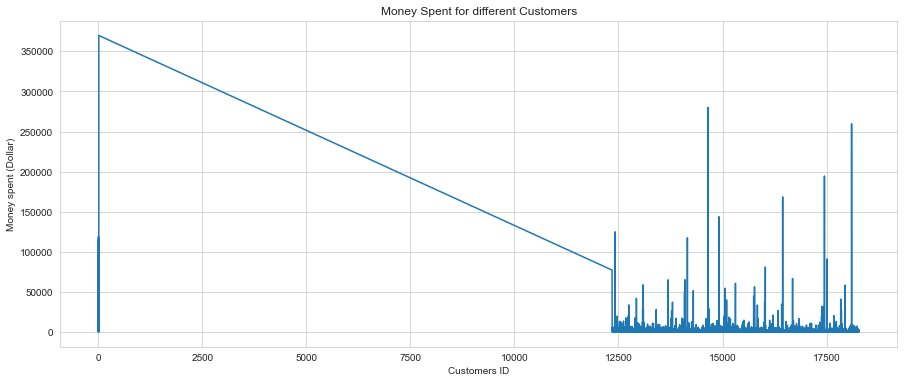

In [53]:
money_spent = df1.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

# 9. TOP 5 customers with highest money spent

In [54]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,cust_id,country,amount_spent
42,12,United Kingdom,369845.05
38,11,United Kingdom,344700.46
1741,14646,Netherlands,280206.02
4253,18102,United Kingdom,259657.30
3780,17450,United Kingdom,194550.79


# 10. How many orders per month?

In [55]:
df1.head()

,invoice_num,stock_code,year_month,month,day,hour,description,quantity,invoice_date,unit_price,cust_id,country,amount_spent
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


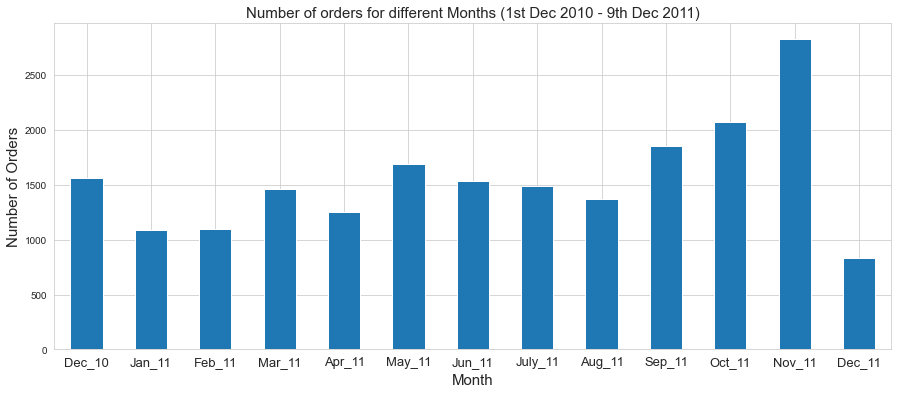

In [56]:
df2 = df1.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
df2.set_xlabel('Month',fontsize=15)
df2.set_ylabel('Number of Orders',fontsize=15)
df2.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
df2.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

# 11. How many orders per day?

In [57]:
df3=df1.groupby('invoice_num')['day'].unique().value_counts().sort_index()
df3

[1]    3153
[2]    3594
[3]    3728
[4]    4276
[5]    3178
[7]    2207
Name: day, dtype: int64

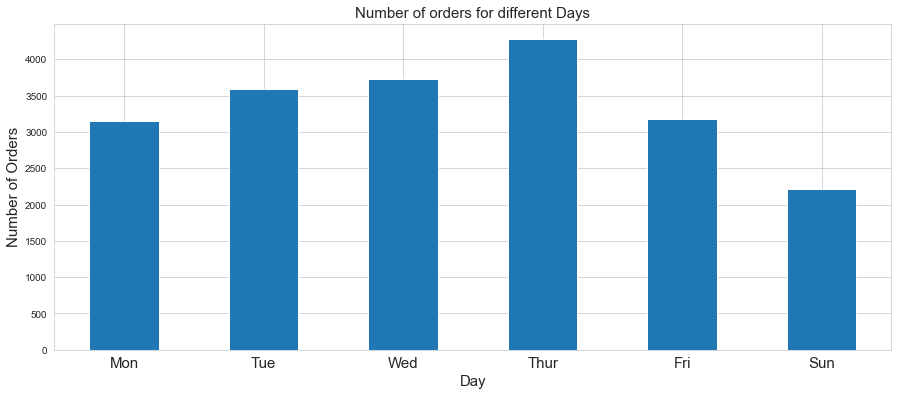

In [58]:
df4 = df3.plot(kind='bar',color=color[0],figsize=(15,6))
df4.set_xlabel('Day',fontsize=15)
df4.set_ylabel('Number of Orders',fontsize=15)
df4.set_title('Number of orders for different Days',fontsize=15)
df4.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

# 12. How many orders per hour?

In [59]:
df5=df1['hour'].value_counts().sort_index()

In [60]:
df6= df1.groupby('invoice_num')['hour'].unique().value_counts()

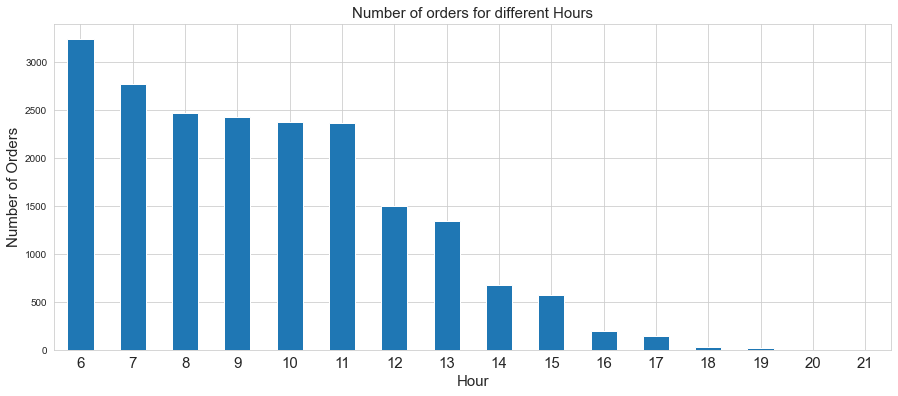

In [61]:
df6= df6.plot(kind='bar',figsize=(15,6))
df6.set_xlabel('Hour',fontsize=15)
df6.set_ylabel('Number of Orders',fontsize=15)
df6.set_title('Number of orders for different Hours',fontsize=15)
df6.set_xticklabels(range(6,22), rotation='horizontal', fontsize=15)
plt.show()

# 13. How many orders for each country?

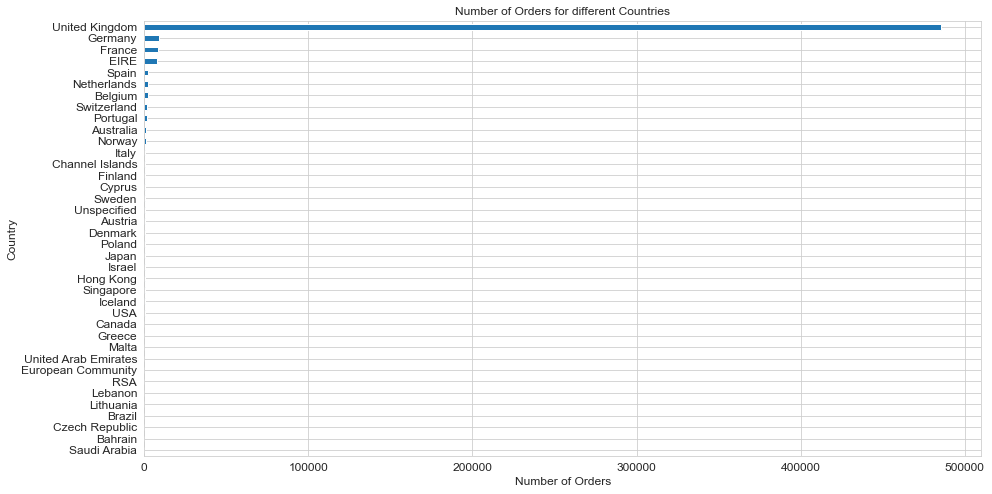

In [62]:
group_country_orders = df1.groupby('country')['invoice_num'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

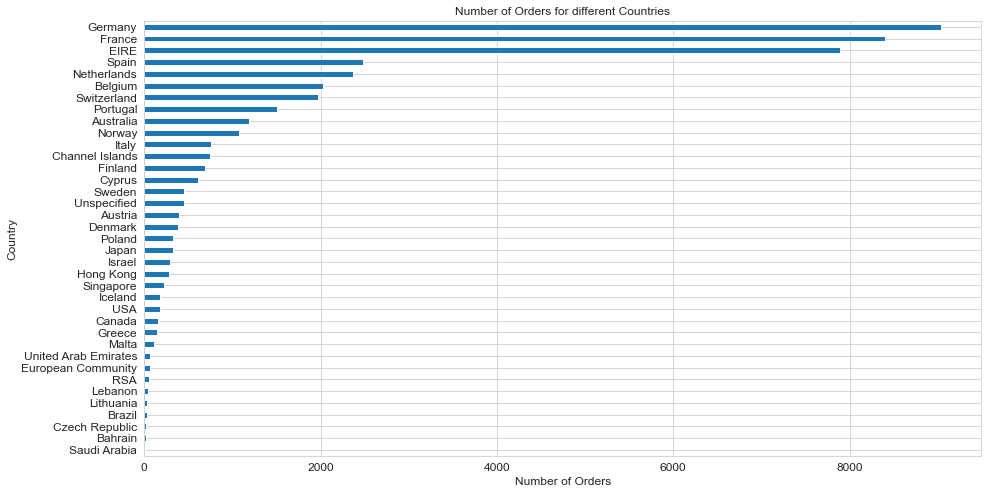

In [63]:
group_country_orders = df1.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

# 14. Orders trend across months

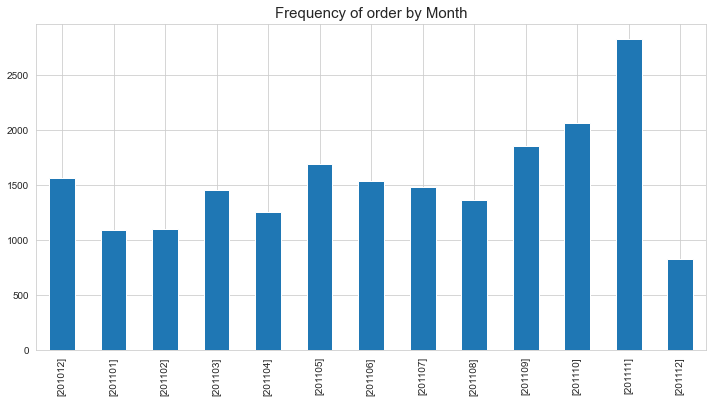

In [64]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Month", fontsize=15)
invoice_date = df1.groupby(['invoice_num'])['year_month'].unique()
invoice_date.value_counts().sort_index().plot.bar()
plt.show()

In [65]:
df_free = df1[df1.unit_price == 0]

In [66]:
df_free.head()

,invoice_num,stock_code,year_month,month,day,hour,description,quantity,invoice_date,unit_price,cust_id,country,amount_spent
6391,536941,22734,201012,12,5,12,amazon,20,2010-12-03 12:08:00,0.0,12,United Kingdom,0.0
6392,536942,22139,201012,12,5,12,amazon,15,2010-12-03 12:08:00,0.0,12,United Kingdom,0.0
9302,537197,22841,201012,12,7,14,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
14335,537534,85064,201012,12,2,11,CREAM SWEETHEART LETTER RACK,1,2010-12-07 11:48:00,0.0,12,United Kingdom,0.0
14336,537534,84832,201012,12,2,11,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-07 11:48:00,0.0,12,United Kingdom,0.0


In [67]:
df_free.year_month.value_counts().sort_index()

201012    140
201101     13
201102     54
201103     40
201104     12
201105     86
201106     41
201107     16
201108     39
201109     24
201110     33
201111     75
201112     14
Name: year_month, dtype: int64

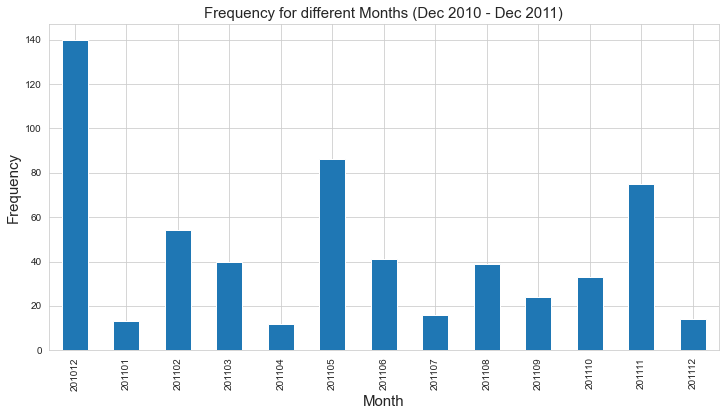

In [68]:
ax = df_free.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color=color[0])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
#ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

In [69]:
df1['month'] = df1.invoice_date.dt.month

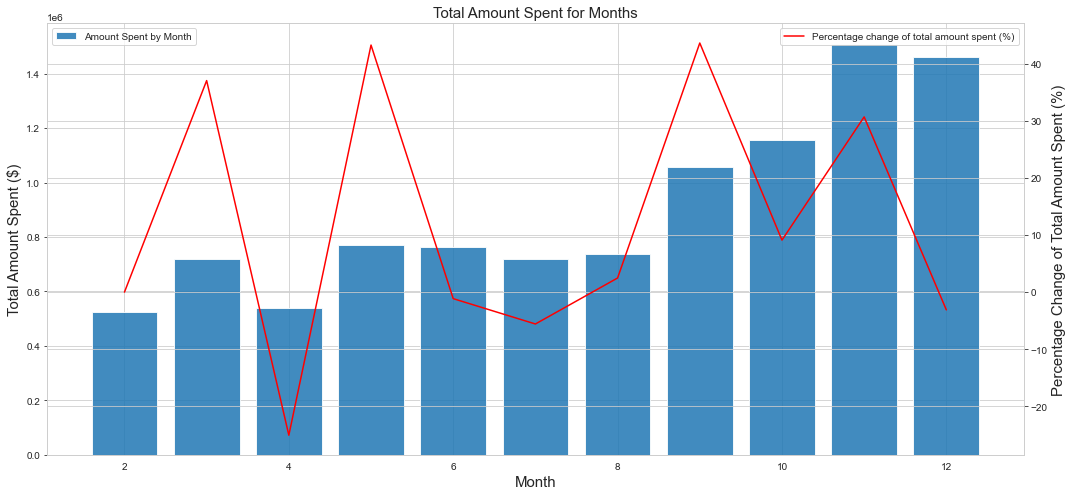

In [70]:
# trend plot
fig = plt.figure(figsize=(15, 7))
x1 = fig.add_subplot(111)

x1.set_xlabel('Month',fontsize=15)
x1.set_ylabel('Total Amount Spent ($)',fontsize=15)
x1.set_title('Total Amount Spent for Months',fontsize=15)

x1.bar(df1.groupby(by=['month'])['amount_spent'].sum().index.tolist()[1:],
        df1.groupby(by=['month'])['amount_spent'].sum()[1:],
        alpha=0.85,#If you want to make the graph plot more transparent, then you can make alpha less than 1, such as 0.5 or 0.25.
        label='Amount Spent by Month')

x2 = x1.twinx()# tread line

x2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)

#pct_change()Percentage change between the current and a prior element.
x2.plot(df1.groupby(by=['month'])['amount_spent'].sum().index.tolist()[1:], 
         df1.groupby(by=['month'])['amount_spent'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='red')

x1.legend(loc='upper left')
x2.legend(loc='upper right')

fig.tight_layout()
plt.show()

In [71]:
df1.head()

,invoice_num,stock_code,year_month,month,day,hour,description,quantity,invoice_date,unit_price,cust_id,country,amount_spent
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# 15. How much money spent by each country?

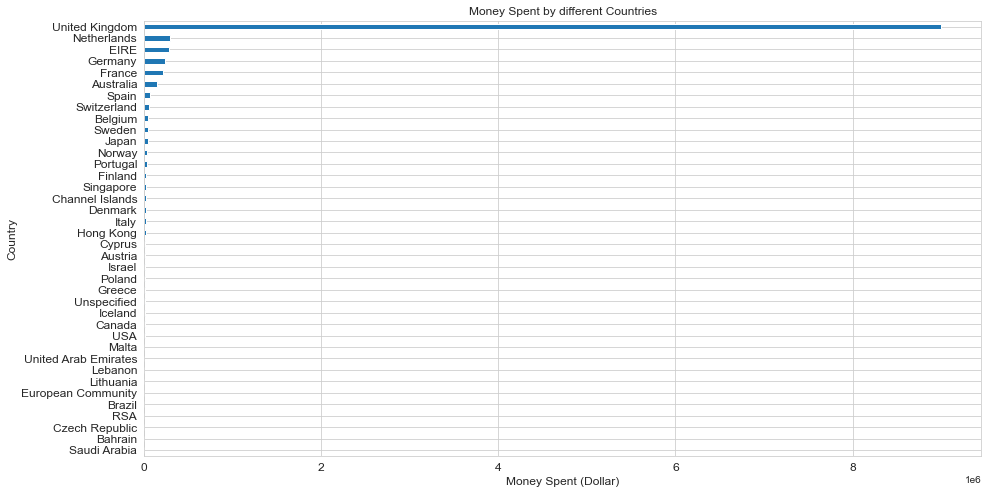

In [72]:
group_country_amount_spent = df1.groupby('country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

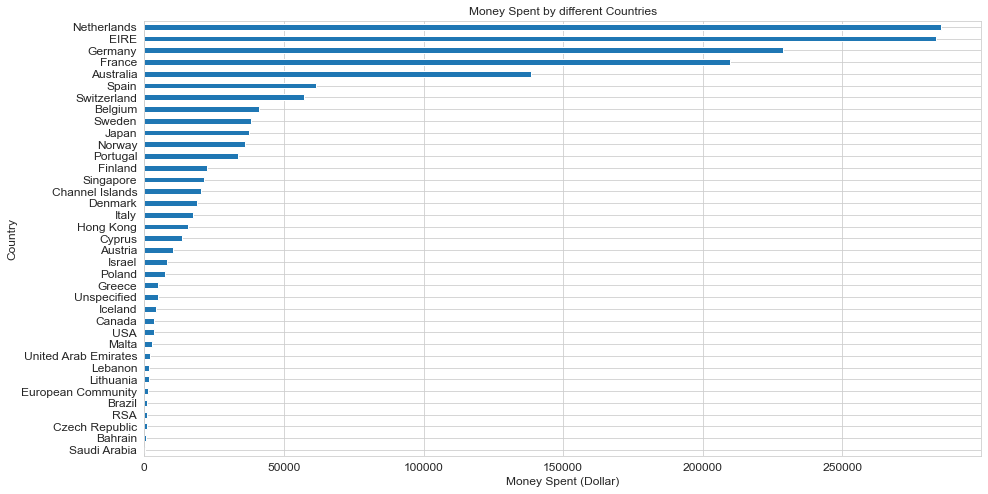

In [73]:
group_country_amount_spent = df1.groupby('country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()
